In [1]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
np.set_printoptions(suppress=True)

In [2]:
#import and format Training Set
TRAIN_CSV_FILE = 'SAKI Exercise 1 - Transaction Classification - Data Set.csv'
data = pd.read_csv(TRAIN_CSV_FILE, sep=';',usecols = [1,4,5,6,7,9])
#data = data.sample(frac = 1) # shuffle data set
data['Kontonummer'] = data['Kontonummer'].astype(str)
data['Betrag'] = data['Betrag'].astype('float')
labels = pd.read_csv(TRAIN_CSV_FILE, sep=';',usecols = [11])

In [3]:
# Label Encode Features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Buchungstext']= le.fit_transform(data['Buchungstext'])
data['Verwendungszweck']= le.fit_transform(data['Verwendungszweck'])
data['Beguenstigter/Zahlungspflichtiger']= le.fit_transform(data['Beguenstigter/Zahlungspflichtiger'])
data['Kontonummer']= le.fit_transform(data['Kontonummer'])
#labels['label']= le.fit_transform(labels['label']) #labels müssen nicht encoded werden.

In [4]:
#convert Pandas Dataframe to Numpy Array and split into Training and Test data sets
results=[]
score=[]
for split in range(40,208):
    #split=10 #rowindex where full data is split into training and test
    train_data = np.array(data.iloc[:split,:])
    test_data = np.array(data.iloc[split:,:])
    train_label = np.ravel(labels.iloc[:split,:])
    test_label = np.ravel(labels.iloc[split:,:])

    #Train Model
    gnb = GaussianNB().fit(train_data, train_label)

    #Test Model.
    index = 0
    counter = 0
    for row in test_data:
        pred = gnb.predict([row])
        if pred == test_label[index]:
            counter = counter + 1
        #else:
        #    print("Predicted:", pred, "Should be:",test_label[index])
        index = index + 1
    results.append(counter/index*100)

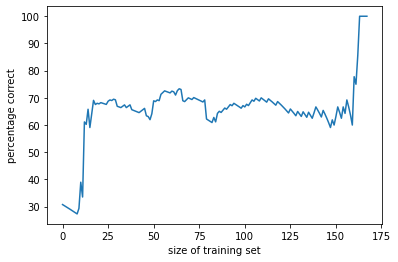

In [5]:
import matplotlib.pyplot as plt
plt.plot(results)
plt.ylabel('percentage correct')
plt.xlabel('size of training set')
plt.show()